In [80]:
import warnings     
warnings.filterwarnings('ignore', category=FutureWarning)
#warnings.filterwarnings('ignore', category=UserWarning)

import requests
import pandas as pd
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Embedding, LSTM, Dense, Dropout
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot

In [ ]:
url = 'https://robogarden-new.s3.us-west-2.amazonaws.com/RGU/data.txt'
filename = 'data.txt'

# Download and save
response = requests.get(url)
with open(filename, 'w', encoding='utf-8') as file:
    file.write(response.text)



In [3]:
# Read it locally
with open(filename, 'r', encoding='utf-8') as file:
    text = file.read() 
    lines = text.lower().split('\n')

In [4]:
print(text[0:200])

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own 


In [5]:
lines

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and tender churl mak'st waste in niggarding:",
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 '',
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:  ',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lusty days;',
 'to say within thine own deep sunken eye

In [ ]:
words= text_to_word_sequence(text)

In [9]:
words

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 "beauty's",
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 "feed'st",
 'thy',
 "light's",
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 "world's",
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 "world's",
 'due',
 'by',
 'the',
 'grav

In [10]:
len(words)

17670

In [13]:

word_series = pd.Series(words)

# Use value_counts() to get the count of each unique word
word_counts = word_series.value_counts()

# Create a DataFrame from the counts
word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

# See count of words in poem
word_df

,Word,Count
0,and,490
1,the,431
2,to,414
3,my,393
4,of,370
...,...,...
3192,twenty,1
3193,misuse,1
3194,honest,1
3195,enlighten,1


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)

tokens = tokenizer.word_index


In [16]:
tokens

{'and': 1,
 'the': 2,
 'to': 3,
 'my': 4,
 'of': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'a': 16,
 'me': 17,
 'but': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'it': 24,
 'you': 25,
 'which': 26,
 'his': 27,
 'when': 28,
 'this': 29,
 'your': 30,
 'by': 31,
 'doth': 32,
 'self': 33,
 'do': 34,
 'from': 35,
 'on': 36,
 'or': 37,
 'no': 38,
 'have': 39,
 'then': 40,
 'what': 41,
 'are': 42,
 'if': 43,
 'more': 44,
 'mine': 45,
 'their': 46,
 'shall': 47,
 'will': 48,
 'sweet': 49,
 'time': 50,
 'eyes': 51,
 'beauty': 52,
 'nor': 53,
 'they': 54,
 'art': 55,
 'her': 56,
 'yet': 57,
 'heart': 58,
 'o': 59,
 'than': 60,
 'now': 61,
 'should': 62,
 'thine': 63,
 'fair': 64,
 'can': 65,
 'make': 66,
 'he': 67,
 'one': 68,
 'hath': 69,
 'where': 70,
 'still': 71,
 'how': 72,
 'him': 73,
 'true': 74,
 'eye': 75,
 'like': 76,
 'see': 77,
 'am': 78,
 'she': 79,
 'those': 80,
 'though': 81,
 'being'

In [18]:
vocabulary_size = len(tokens) + 1
print('Vocabulary Size:', vocabulary_size)

Vocabulary Size: 3198


In [ ]:
#Build the sequences to create the order of words for prediction
sequences = tokenizer.texts_to_sequences(lines)
sequences

[[35, 412, 874, 162, 214, 507],
 [8, 875, 132, 348, 100, 154, 194],
 [18, 22, 2, 876, 62, 31, 50, 638],
 [27, 309, 639, 100, 195, 27, 274],
 [18, 10, 877, 3, 63, 85, 215, 51],
 [1372, 9, 1373, 640, 11, 33, 1374, 1375],
 [196, 16, 1376, 70, 508, 197],
 [9, 33, 9, 1377, 3, 9, 49, 33, 133, 275],
 [10, 8, 55, 61, 2, 413, 310, 414],
 [1, 349, 1378, 3, 2, 1379, 415],
 [216, 63, 85, 878, 1380, 9, 879],
 [1, 309, 880, 881, 311, 7, 1381],
 [252, 2, 94, 37, 416, 29, 1382, 21],
 [3, 641, 2, 413, 350, 31, 2, 642, 1, 19],
 [],
 [28, 1383, 882, 47, 883, 9, 276],
 [1, 1384, 277, 1385, 7, 9, 132, 1386],
 [9, 1387, 176, 1388, 20, 1389, 36, 61],
 [48, 21, 16, 884, 643, 5, 885, 123, 886],
 [40, 82, 1390, 70, 23, 9, 52, 197],
 [70, 23, 2, 253, 5, 9, 887, 141],
 [3, 95, 216, 63, 85, 277, 1391, 51],
 [86, 142, 23, 1392, 230, 1, 1393, 96],
 [72, 143, 44, 96, 1394, 9, 132, 183],
 [43, 10, 1395, 644, 1396, 64, 278, 5, 45],
 [47, 509, 4, 510, 1, 66, 4, 113, 1397],
 [1398, 27, 52, 31, 1399, 63],
 [29, 86, 3, 21,

#### Find subsequences 

In [24]:
#Findsubsequences 
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
       subsequence = sequence[:i+1]
       subsequences.append(subsequence)

In [25]:
subsequences

[[35, 412],
 [35, 412, 874],
 [35, 412, 874, 162],
 [35, 412, 874, 162, 214],
 [35, 412, 874, 162, 214, 507],
 [8, 875],
 [8, 875, 132],
 [8, 875, 132, 348],
 [8, 875, 132, 348, 100],
 [8, 875, 132, 348, 100, 154],
 [8, 875, 132, 348, 100, 154, 194],
 [18, 22],
 [18, 22, 2],
 [18, 22, 2, 876],
 [18, 22, 2, 876, 62],
 [18, 22, 2, 876, 62, 31],
 [18, 22, 2, 876, 62, 31, 50],
 [18, 22, 2, 876, 62, 31, 50, 638],
 [27, 309],
 [27, 309, 639],
 [27, 309, 639, 100],
 [27, 309, 639, 100, 195],
 [27, 309, 639, 100, 195, 27],
 [27, 309, 639, 100, 195, 27, 274],
 [18, 10],
 [18, 10, 877],
 [18, 10, 877, 3],
 [18, 10, 877, 3, 63],
 [18, 10, 877, 3, 63, 85],
 [18, 10, 877, 3, 63, 85, 215],
 [18, 10, 877, 3, 63, 85, 215, 51],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 640],
 [1372, 9, 1373, 640, 11],
 [1372, 9, 1373, 640, 11, 33],
 [1372, 9, 1373, 640, 11, 33, 1374],
 [1372, 9, 1373, 640, 11, 33, 1374, 1375],
 [196, 16],
 [196, 16, 1376],
 [196, 16, 1376, 70],
 [196, 16, 1376, 70, 508],
 [196, 16

#### Pad the sequences

In [27]:
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

In [35]:
print(sequences[0:6])

[[  0   0   0   0   0   0   0   0   0  35 412]
 [  0   0   0   0   0   0   0   0  35 412 874]
 [  0   0   0   0   0   0   0  35 412 874 162]
 [  0   0   0   0   0   0  35 412 874 162 214]
 [  0   0   0   0   0  35 412 874 162 214 507]
 [  0   0   0   0   0   0   0   0   0   8 875]]


In [36]:
sequences.shape

(15514, 11)

In [39]:

x, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size)

In [53]:
print(x.shape,y.shape)

(15514, 10) (15514, 3198)


In [58]:
model = Sequential()

In [59]:
model.add(Embedding(input_dim = vocabulary_size, 
                    output_dim = 100,
                    input_shape = (sequence_length - 1,))) # input_dim

In [60]:
model.add(LSTM(units = 10))

In [63]:
model.add(Dropout(rate=0.1))

In [64]:
model.add(Dense(units=vocabulary_size, activation ='softmax'))

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 10, 100)        │       319,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10)             │         4,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3198)           │        35,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,418 (1.37 MB)

 Trainable params: 359,418 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

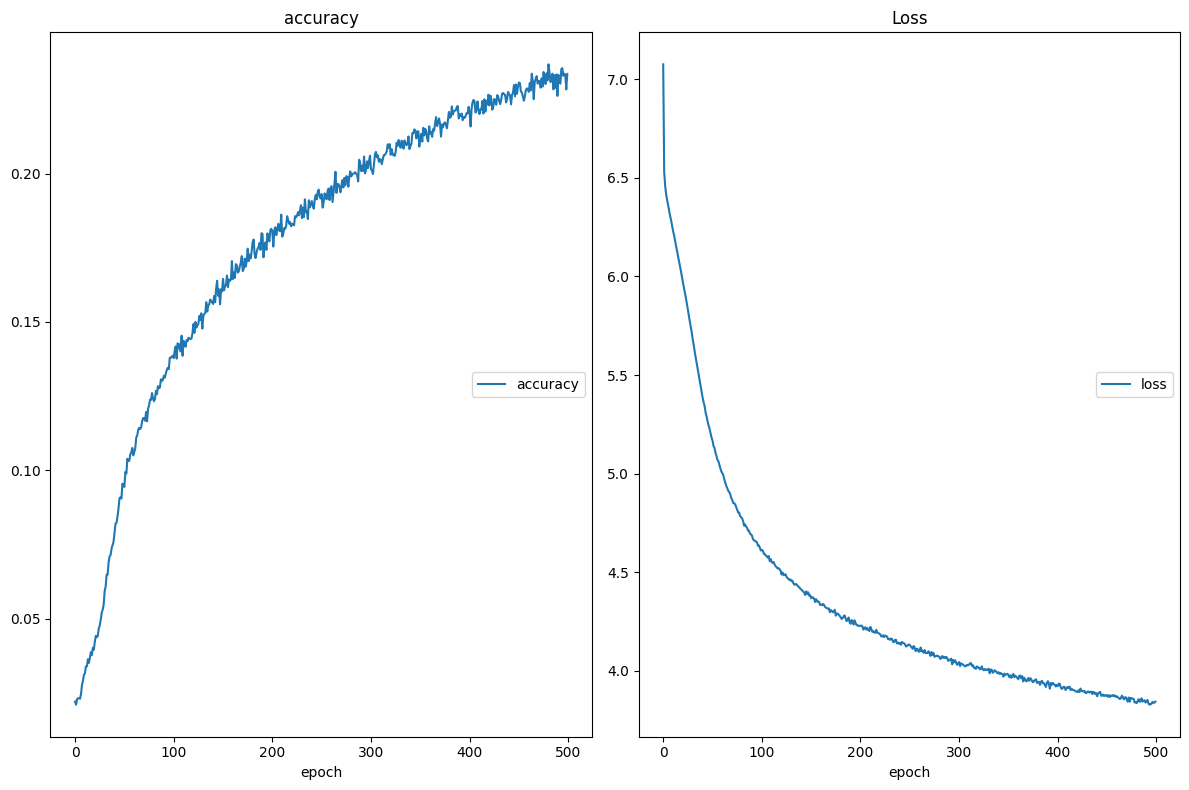

accuracy
	accuracy         	 (min:    0.021, max:    0.237, cur:    0.234)
Loss
	loss             	 (min:    3.829, max:    7.075, cur:    3.845)
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2321 - loss: 3.8346


In [69]:
model.fit(x, y,
          callbacks=[PlotLossesKeras()],
          epochs = 500) 

In [70]:
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

compile_metrics: 32.24%


### Hypertune 

In [71]:
model_1 = Sequential()

model_1.add(Embedding(input_dim = vocabulary_size, 
                    output_dim = 100,
                    input_shape = (sequence_length - 1,))) # input_dim

model_1.add(LSTM(units = 100)) # Increased from 10 to 100 - Not enough nodes to handle the patterns

model_1.add(Dropout(rate=0.1))

model_1.add(Dense(units=vocabulary_size, activation ='softmax'))

model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 10, 100)        │       319,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3198)           │       322,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 723,198 (2.76 MB)

 Trainable params: 723,198 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

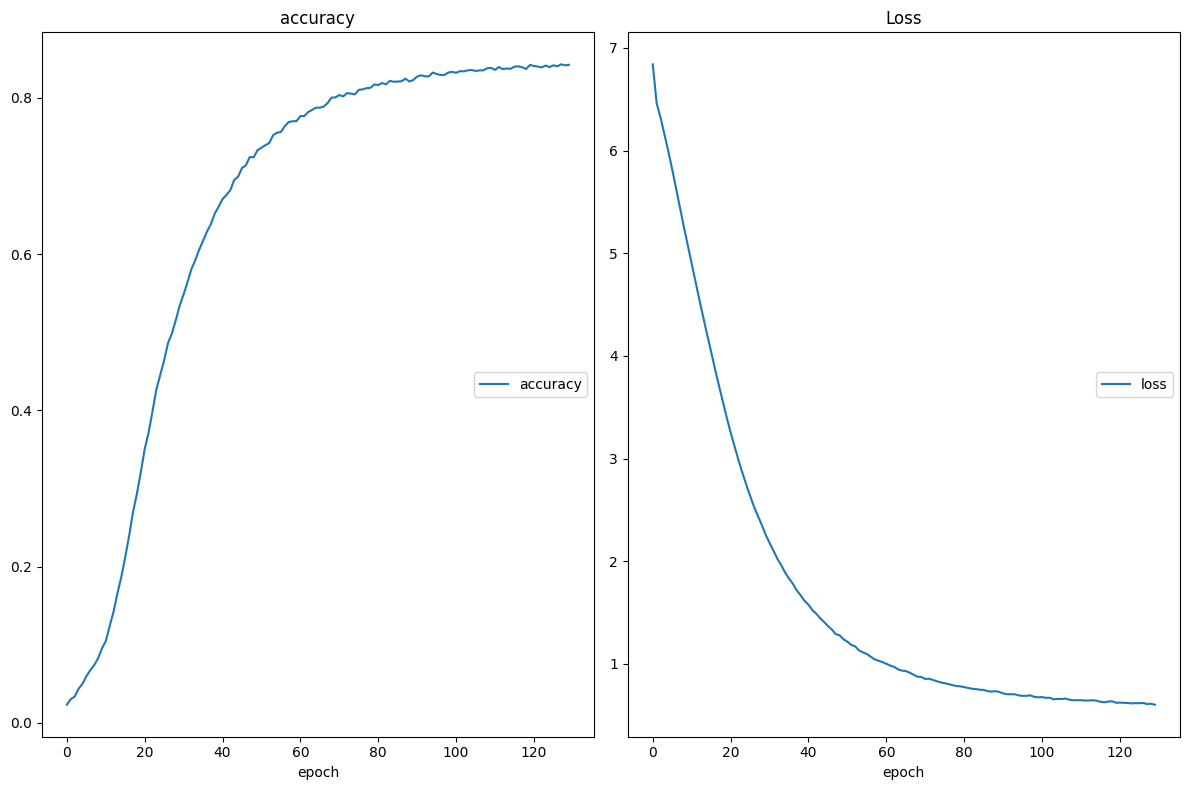

accuracy
	accuracy         	 (min:    0.023, max:    0.843, cur:    0.842)
Loss
	loss             	 (min:    0.603, max:    6.839, cur:    0.603)
485/485 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8462 - loss: 0.5879


In [74]:
callbacks = EarlyStopping(monitor = 'accuracy',
                          min_delta = 0.001,
                          patience = 10, 
                          verbose = 0,
                          mode = "auto")

model_1.fit(x, y,
          callbacks=[PlotLossesKeras(), callbacks],
          epochs = 200) 

In [75]:
scores = model_1.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

compile_metrics: 86.70%
